In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
sns.set_theme(style="whitegrid")

In [46]:
results_path = "results/optimiser_tuning_results"
all_files = glob.glob(os.path.join(results_path, "*.csv"))

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

results_df = pd.concat(dfs, ignore_index=True)

In [47]:
results_df

,alg,seed,fitness,theta,gens,time_sec,pop_size,stalled_gens,r_repulsion,r_orientation,r_attraction,alpha,beta,w,c1,c2
0,ABC,0,2.119045,"[-0.0014765600360184235, 0.8962493810920868, 0...",50,0.06,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABC,1,2.063180,"[-0.10892858315532239, -0.1612389179817285, -0...",50,0.06,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABC,2,2.211842,"[-0.04740314649315419, 0.007566762945669991, 0...",50,0.06,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABC,3,2.230625,"[0.1936260444997146, -0.8819908464809376, 0.06...",50,0.06,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,4,1.944300,"[0.10011083247916552, -0.8576170843288415, 0.1...",50,0.06,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,PSO,0,2.353689,"[-0.14849860758818978, -0.20767021588313517, 0...",17,0.03,100,10.0,NaN,NaN,NaN,NaN,NaN,0.9,1.8,1.8
1256,PSO,1,2.734135,"[0.018208757669277015, -0.22149433750410685, 0...",16,0.02,100,10.0,NaN,NaN,NaN,NaN,NaN,0.9,1.8,1.8
1257,PSO,2,3.757628,"[-0.1235062426359047, -0.17119734809160247, 0....",17,0.03,100,10.0,NaN,NaN,NaN,NaN,NaN,0.9,1.8,1.8
1258,PSO,3,2.888876,"[-1.003325352964478, 0.07783731545308942, 1.04...",20,0.03,100,10.0,NaN,NaN,NaN,NaN,NaN,0.9,1.8,1.8


In [59]:
def final_fitness(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="alg", y="fitness")
    plt.title("Final Fitness Distribution by Algorithm")
    plt.ylabel("Final Fitness (lower is better)")
    plt.grid(True)
    plt.show()

def run_time_comparison(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="alg", y="time_sec")
    plt.title("Run Time Distribution by Algorithm")
    plt.ylabel("Run Time (seconds)")
    plt.grid(True)
    plt.show()

def fitness_vs_run_time(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="time_sec", y="fitness", hue="alg", alpha=0.7)
    plt.title("Fitness vs Run Time by Algorithm")
    plt.xlabel("Run Time (seconds)")
    plt.ylabel("Final Fitness (lower is better)")
    plt.grid(True)
    plt.show()

def fitness_heatmaps_pso_cab(df):
    pso_df = df[df["alg"] == "PSO"]
    if not pso_df.empty:
        pivot_pso = pso_df.pivot_table(index="w", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_pso, annot=True, fmt=".3f", cmap="viridis")
        plt.title("PSO: Fitness by w and Population Size (Best is closest to 0)")
        plt.xlabel("Population Size")
        plt.ylabel("w (inertia)")
        plt.tight_layout()
        plt.show()

        pivot_pso_c1 = pso_df.pivot_table(index="c1", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_pso_c1, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.title("PSO: Fitness by c1 (cognitive) and Population Size")
        plt.xlabel("Population Size")
        plt.ylabel("c1 (Cognitive Weight)")
        plt.tight_layout()
        plt.show()

        pivot_pso_c2 = pso_df.pivot_table(index="c2", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_pso_c2, annot=True, fmt=".3f", cmap="YlOrRd")
        plt.title("PSO: Fitness by c2 (social) and Population Size")
        plt.xlabel("Population Size")
        plt.ylabel("c2 (Social Weight)")
        plt.tight_layout()
        plt.show()


    cab_df = df[df["alg"] == "CAB"]
    if not cab_df.empty:
        pivot_cab = cab_df.pivot_table(index="alpha", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_cab, annot=True, fmt=".3f", cmap="coolwarm")
        plt.title("CAB: Fitness by Alpha and Population Size (Best is closest to 0)")
        plt.xlabel("Population Size")
        plt.ylabel("Alpha")
        plt.tight_layout()
        plt.show()

        pivot_cab_beta = cab_df.pivot_table(index="beta", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_cab_beta, annot=True, fmt=".3f", cmap="crest")
        plt.title("CAB: Fitness by Beta and Population Size (Best is closest to 0)")
        plt.xlabel("Population Size")
        plt.ylabel("Beta")
        plt.tight_layout()
        plt.show()

        pivot_cab_rrep = cab_df.pivot_table(index="r_repulsion", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_cab_rrep, annot=True, fmt=".3f", cmap="flare")
        plt.title("CAB: Fitness by Repulsion Radius and Population Size (Best is closest to 0")
        plt.xlabel("Population Size")
        plt.ylabel("r_repulsion")
        plt.tight_layout()
        plt.show()

        pivot_cab_rori = cab_df.pivot_table(index="r_orientation", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_cab_rori, annot=True, fmt=".3f", cmap="mako")
        plt.title("CAB: Fitness by Orientation Radius and Population Size (Best is closest to 0")
        plt.xlabel("Population Size")
        plt.ylabel("r_orientation")
        plt.tight_layout()
        plt.show()

        pivot_cab_ratt = cab_df.pivot_table(index="r_attraction", columns="pop_size", values="fitness", aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_cab_ratt, annot=True, fmt=".3f", cmap="rocket")
        plt.title("CAB: Fitness by Attraction Radius and Population Size (Best is closest to 0")
        plt.xlabel("Population Size")
        plt.ylabel("r_attraction")
        plt.tight_layout()
        plt.show()


def plot_best_fitness(df):
    best_fitness_df = df.loc[df.groupby("alg")["fitness"].idxmin()]

    plt.figure(figsize=(8, 5))
    sns.barplot(data=best_fitness_df, x="alg", y="fitness", palette="Set2")
    plt.title("Best Fitness Achieved per Algorithm")
    plt.ylabel("Best Fitness (lower is better)")
    plt.xlabel("Algorithm")
    plt.tight_layout()
    plt.show()


def plot_best_pop_size(df):
    mean_fitness_by_pop = (
        df.groupby(["alg", "pop_size"])["gens"]
        .mean()
        .reset_index()
    )

    best_pop_df = (
        mean_fitness_by_pop.loc[mean_fitness_by_pop.groupby("alg")["gens"].idxmin()]
    )

    plt.figure(figsize=(8, 5))
    sns.barplot(data=best_pop_df, x="alg", y="pop_size", palette="Set3")
    plt.title("Best Population Size per Algorithm (Based on Mean Fitness)")
    plt.ylabel("Optimal Population Size")
    plt.xlabel("Algorithm")
    plt.tight_layout()
    plt.show()


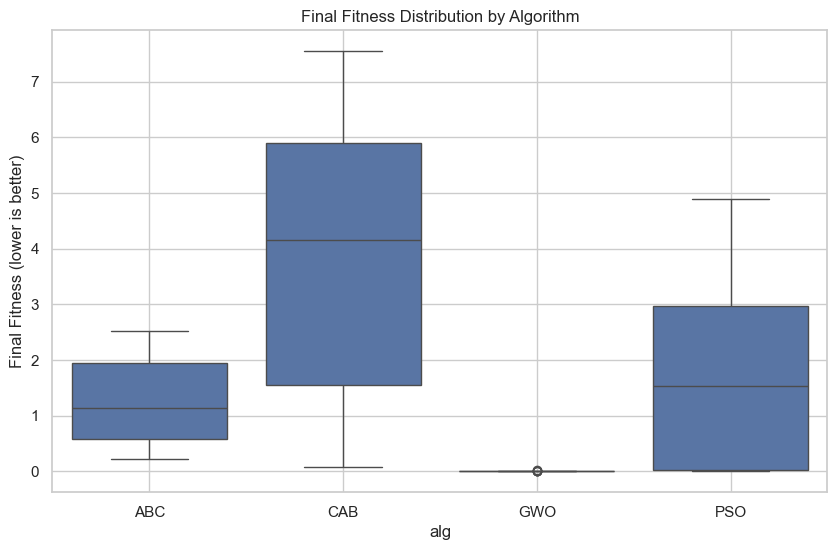

In [49]:
final_fitness(results_df)

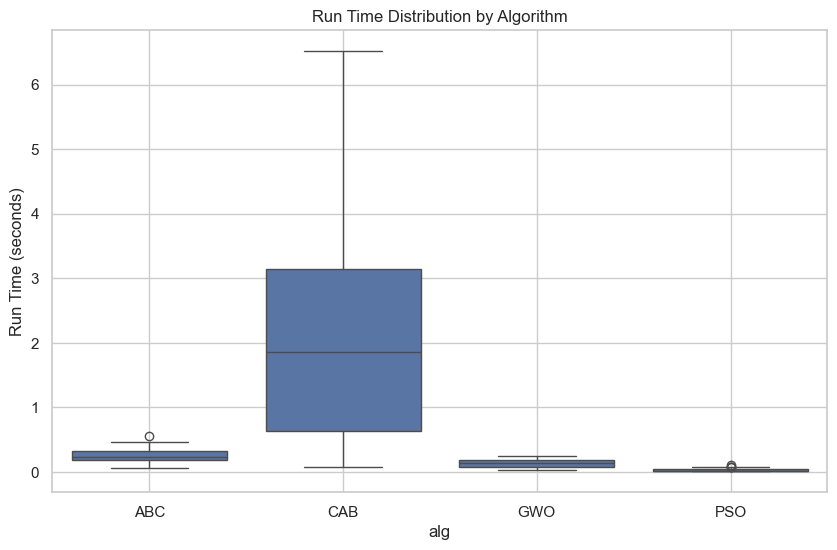

In [50]:
run_time_comparison(results_df)

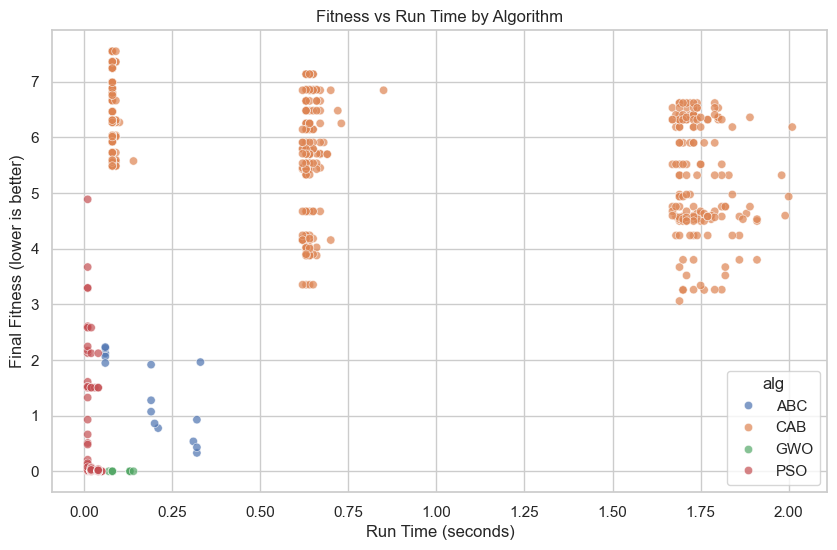

In [25]:
fitness_vs_run_time(results_df)

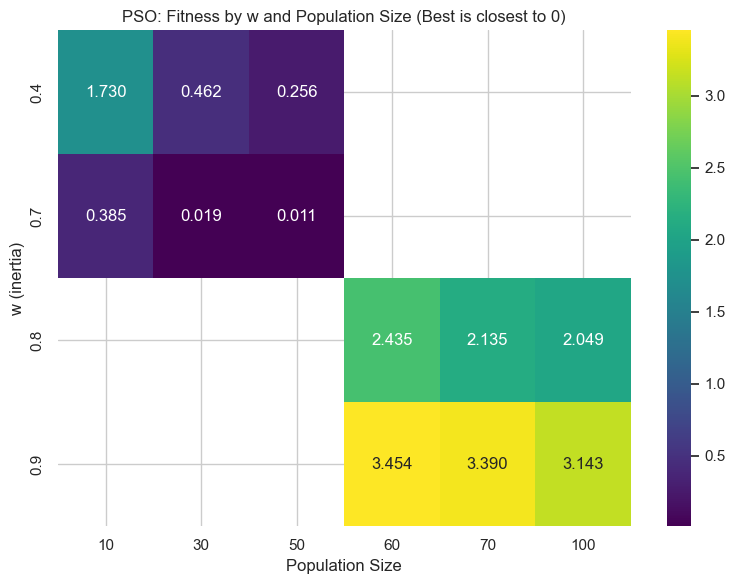

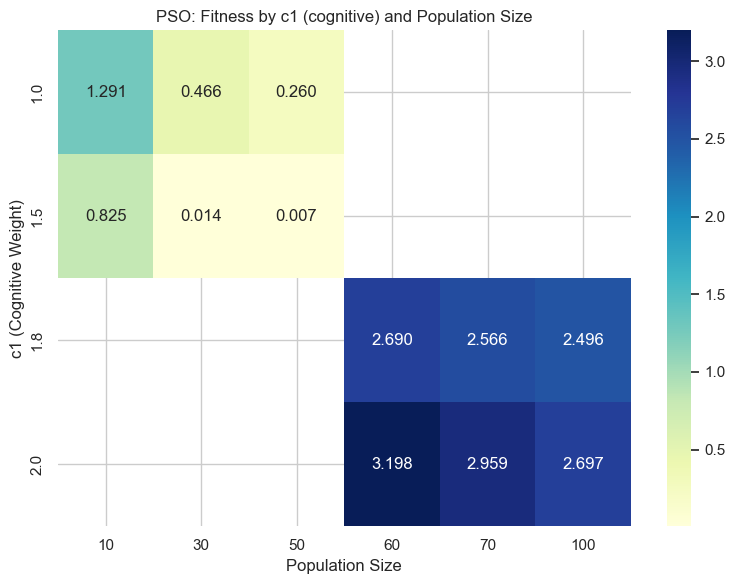

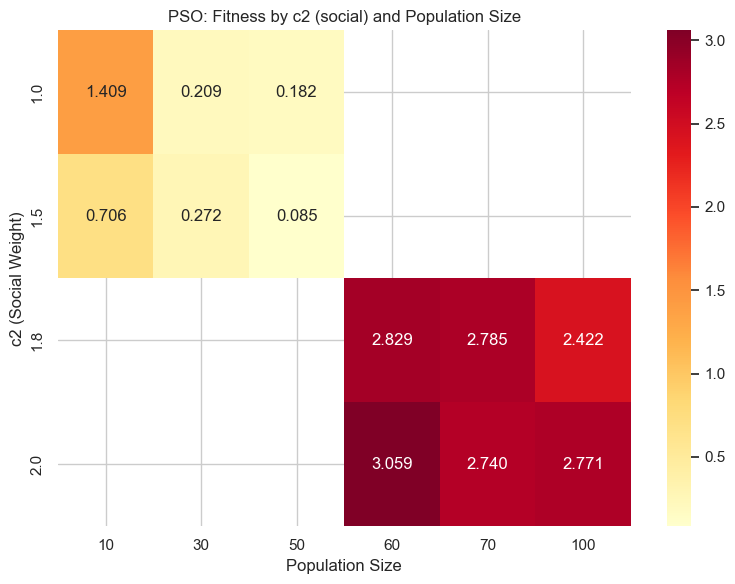

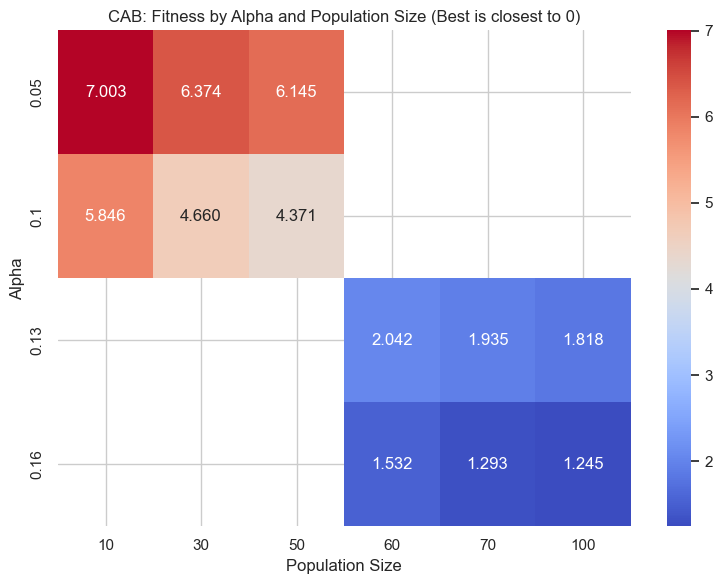

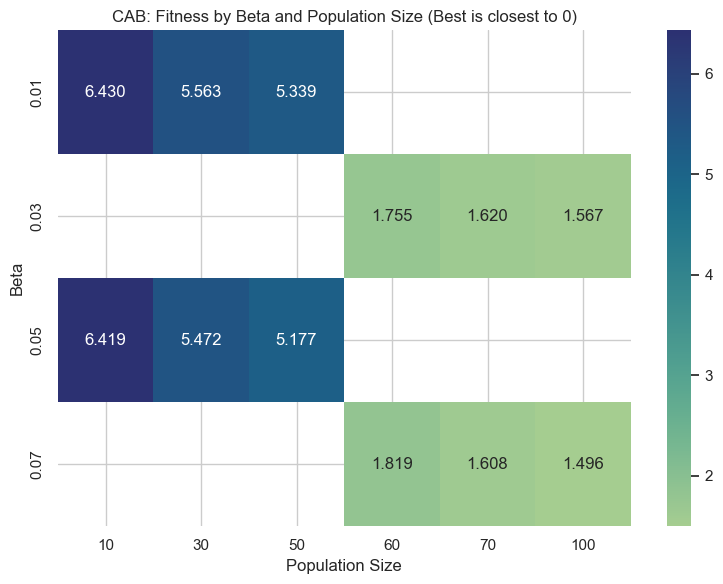

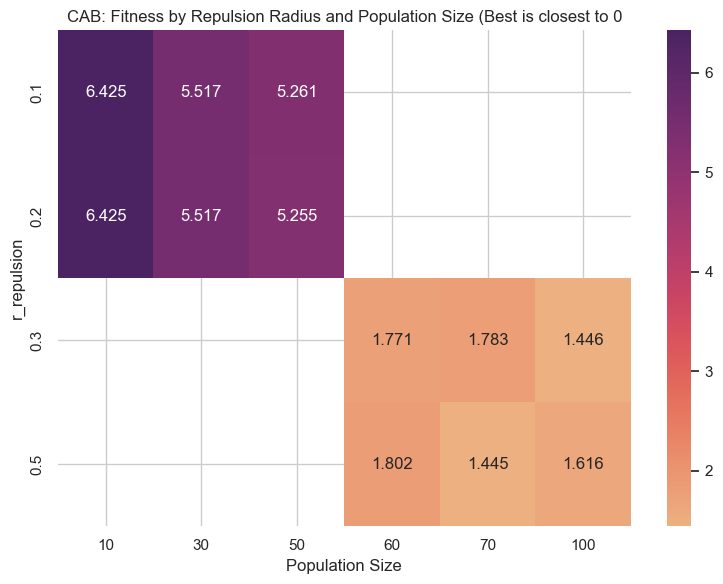

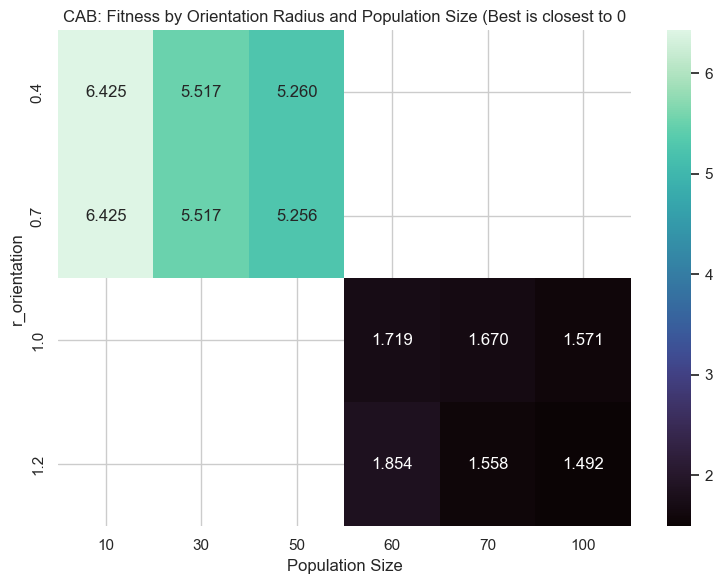

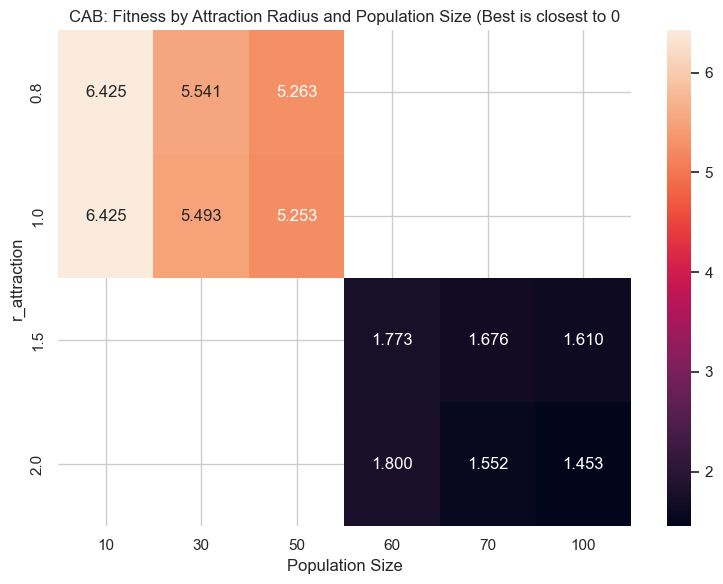

In [51]:
fitness_heatmaps_pso_cab(results_df)

C:\Users\thanh\AppData\Local\Temp\ipykernel_24984\718113995.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_fitness_df, x="alg", y="fitness", palette="Set2")


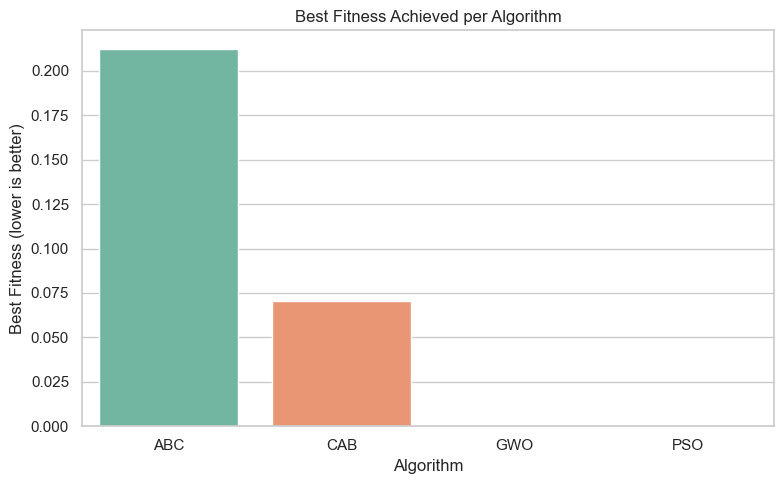

In [52]:
plot_best_fitness(results_df)

C:\Users\thanh\AppData\Local\Temp\ipykernel_24984\549026061.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_pop_df, x="alg", y="pop_size", palette="Set3")


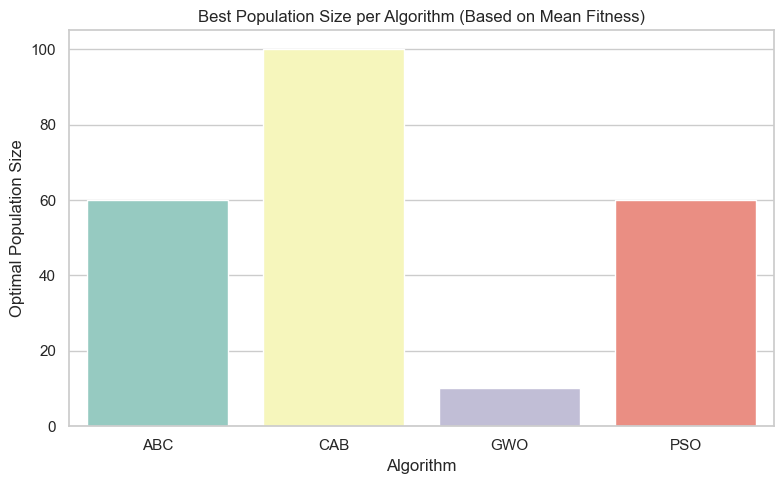

In [60]:
plot_best_pop_size(results_df)

In [61]:
idx_best = results_df.groupby("alg")["fitness"].idxmin()
best_df = results_df.loc[idx_best].reset_index(drop=True)
best_df

,alg,seed,fitness,theta,gens,time_sec,pop_size,stalled_gens,r_repulsion,r_orientation,r_attraction,alpha,beta,w,c1,c2
0,ABC,1,2.121827e-01,"[-0.004401202813065212, 0.023236571891181695, ...",50,0.45,70,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAB,0,7.038373e-02,"[0.01638195235187352, 0.007661060614547351, 0....",50,6.22,100,7.0,0.5,1.2,1.5,0.16,0.07,NaN,NaN,NaN
2,GWO,2,4.439543e-09,"[1.1995572638861627e-09, -1.0756910058839836e-...",50,0.25,100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PSO,0,4.256539e-07,"[-1.2860290002026295e-07, -4.518765248095378e-...",50,0.04,50,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,1.0
